In [68]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


oscarWinners = pd.read_csv('./movies.csv')
oscarWinners.head(15)

,Title,Runtime,Director,Country,Metascore,Genre,Award Wins,Award Nominations,Box Office
0,Parasite,132,Bong Joon Ho,South Korea,96,"Drama, Thriller",306,264,53369749
1,Green Book,130,Peter Farrelly,"United States, China",69,"Biography, Comedy, Drama",58,123,85080171
2,The Shape of Water,123,Guillermo del Toro,"United States, Mexico",87,"Drama, Fantasy, Romance",136,350,63859435
3,Moonlight,111,Barry Jenkins,United States,99,Drama,233,309,27854932
4,Spotlight,129,Tom McCarthy,United States,93,"Biography, Crime, Drama",124,144,45055776
5,Birdman or (The Unexpected Virtue of Ignorance),119,Alejandro G. Iñárritu,United States,87,"Comedy, Drama",192,293,42340598
6,12 Years a Slave,134,Steve McQueen,"United States, United Kingdom",96,"Biography, Drama, History",243,337,56671993
7,Argo,120,Ben Affleck,"United Kingdom, United States",86,"Biography, Drama, Thriller",95,156,136025503
8,The Artist,100,Michel Hazanavicius,"France, Belgium, United States",89,"Comedy, Drama, Romance",162,204,44671682
9,The King's Speech,118,Tom Hooper,"United Kingdom, United States",88,"Biography, Drama, History",108,206,138797449


# What was the Runtime for each movie?

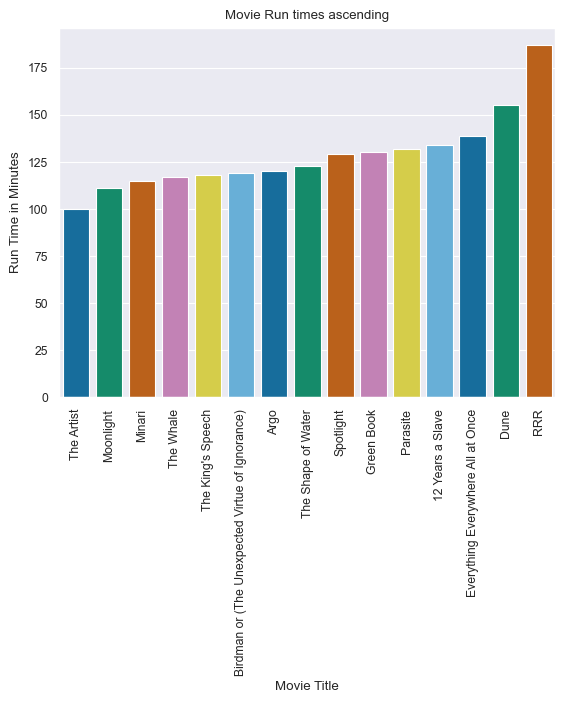

In [69]:
colorPalette = sns.color_palette('colorblind6')
sns.barplot(data=oscarWinners.sort_values('Runtime'), x='Title', y='Runtime', palette=colorPalette)
sns.set_theme('paper')

plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Run Time in Minutes')
 
# title of plot
plt.title('Movie Run times ascending')
plt.show()

## What Movie had the Longest Runtime?
#### RRR

## Is there any relationship between runtime and number of Awards won?

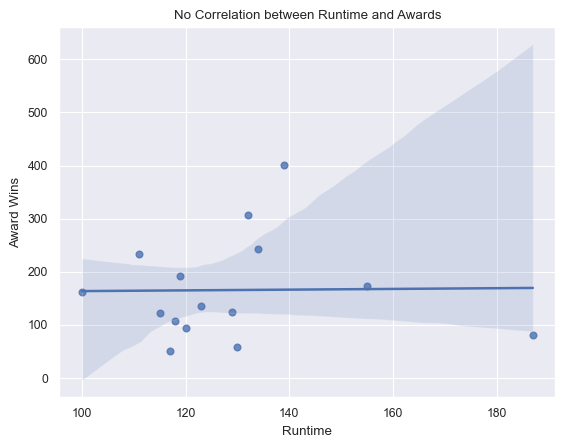

In [70]:
sns.set_theme('paper')
sns.regplot(x="Runtime", y="Award Wins", data=oscarWinners, fit_reg=True)

plt.xlabel('Runtime')
plt.ylabel('Award Wins')
 
# title of plot
pvalues = []
plt.title('No Correlation between Runtime and Awards')
plt.show()

In [71]:
oscarWinners.corr(method="kendall", min_periods=1, numeric_only=True)

,Runtime,Metascore,Award Wins,Award Nominations,Box Office
Runtime,1.000000,-0.212583,0.104762,0.123810,0.219048
Metascore,-0.212583,1.000000,0.444491,0.251234,-0.135280
Award Wins,0.104762,0.444491,1.000000,0.676190,0.047619
Award Nominations,0.123810,0.251234,0.676190,1.000000,0.142857
Box Office,0.219048,-0.135280,0.047619,0.142857,1.000000


### No Correlatation
0.104762 corrlation between Award Wins and Runtime meaning no correlation

## How many awards and nominations did each movie receive?

In [72]:
awardsDict = {"Title":oscarWinners['Title'], "Awards":(oscarWinners["Award Wins"] + oscarWinners["Award Nominations"]), "Run Time":oscarWinners['Runtime'], "Box Office":oscarWinners['Box Office']/1000000}
awards = pd.DataFrame(data=awardsDict)

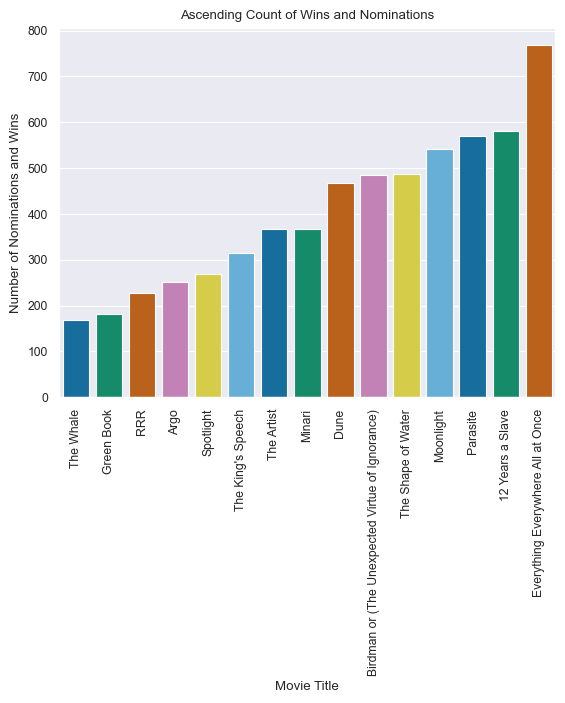

In [73]:
colorPalette = sns.color_palette('colorblind6')
sns.barplot(data=awards.sort_values('Awards'), x='Title', y='Awards', palette=colorPalette)
sns.set_theme('paper')

plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Number of Nominations and Wins')
 
# title of plot
plt.title('Ascending Count of Wins and Nominations')
plt.show()

# Is there a relationship between sales and awards?

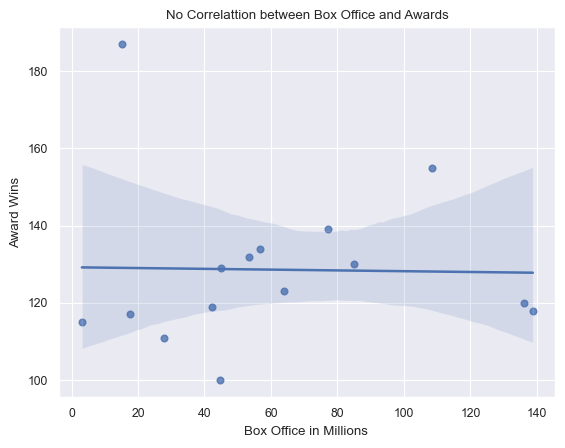

,Awards,Run Time,Box Office
Awards,1.000000,0.123810,0.066667
Run Time,0.123810,1.000000,0.219048
Box Office,0.066667,0.219048,1.000000


In [74]:
sns.set_theme('paper')
sns.regplot(x="Box Office", y="Run Time", data=awards, fit_reg=True)

plt.xlabel('Box Office in Millions ')
plt.ylabel('Award Wins')
 
# title of plot
plt.title('No Correlattion between Box Office and Awards')
plt.show()
awards.corr(method="kendall", min_periods=1, numeric_only=True)

### No Correlation
With a correlation of .066 there is no correlation between Box Office Sales and Awards

## Is there a relationship between box office earnings and movie runtimes?

In [75]:
awards.corr(method="kendall", min_periods=1, numeric_only=True)

,Awards,Run Time,Box Office
Awards,1.000000,0.123810,0.066667
Run Time,0.123810,1.000000,0.219048
Box Office,0.066667,0.219048,1.000000


### Very Weak Correlation
With a correation of .219 between Box Office and Run Time there is perhaps a very weak correlation between box office earnings and movie runtimes

# How much did each movie earn at the box office?

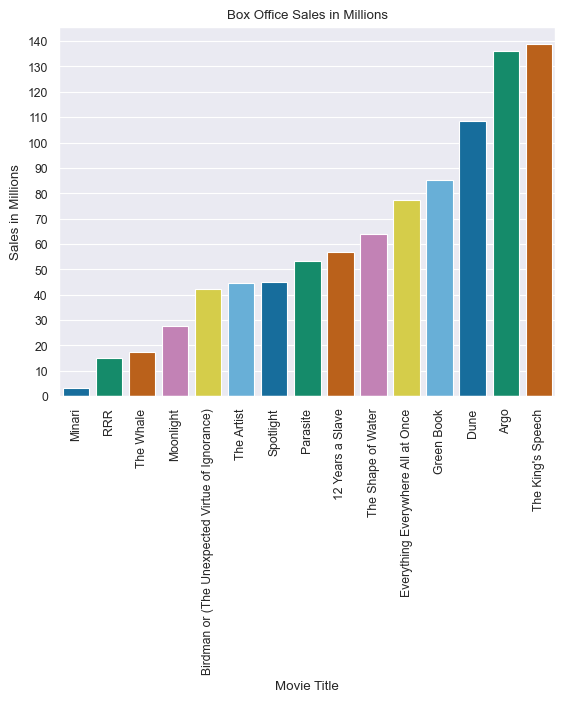

In [76]:
sns.set_theme('paper')
colorPalette = sns.color_palette('colorblind6')
sns.barplot(data=awards.sort_values(by='Box Office'), x='Title', y='Box Office', palette=colorPalette)
plt.xticks(rotation=90)
plt.yticks(range(0,150,10))
plt.xlabel("Movie Title")
plt.ylabel("Sales in Millions")
plt.title('Box Office Sales in Millions')
plt.show()

# What is the total count of each genre present in the dataset?

In [77]:
genres=[]
for i in range(len(oscarWinners['Genre'])):
    tempGenre = oscarWinners['Genre'].iloc[i].split(', ')
    genres.extend(tempGenre)
uniqueGenres = pd.Series(genres)
uniqueGenres = pd.Series(uniqueGenres.unique())
genreCount= list(range(len(uniqueGenres)))
for l in range(len(genreCount)):
    genreCount[l]=0
    for m in range(len(oscarWinners['Genre'])):
        if(uniqueGenres.iloc[l] in oscarWinners['Genre'].iloc[m].split(', ')):
            genreCount[l]+=1
genreCountDict = {"Genre":uniqueGenres,"Count":genreCount}
genreCountDF = pd.DataFrame(data=genreCountDict)


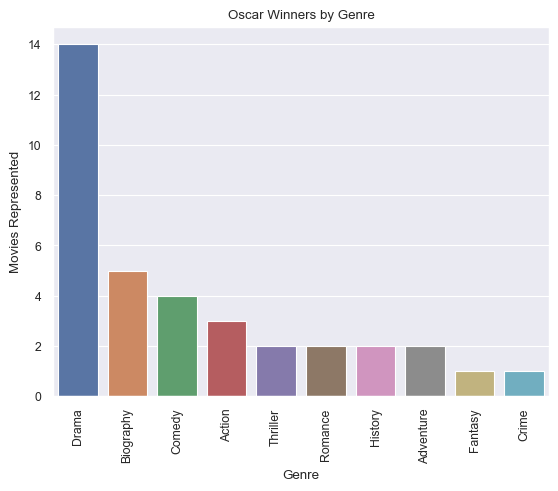

In [78]:
sns.set_theme('paper')
sns.barplot(data=genreCountDF.sort_values(by='Count',ascending=False), x='Genre', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Movies Represented')
 
# title of plot
plt.title('Oscar Winners by Genre')
plt.show()


*The oscar voting members highly favors drama*